# Portada.

### P/E estimator.

In [15]:
### Libraries to use.
import pandas as pd 
import numpy as np
import yfinance as yf
import yahoo_fin.stock_info as si
import fix_yahoo_finance as fix
import pandas_datareader.data as web
import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

First, let's get the tickers of the companies we're interested in. [Click here to get them.](https://www.nasdaq.com/market-activity/stocks/screener)

In [2]:
### Import tickers.
tickers = pd.read_csv('Large_cap_growth_tickers.csv')

### Filter tickers with at least 5 years since IPO.
tickers['IPO Dif'] = datetime.datetime.now().year - tickers['IPO Year']
tickers = tickers[(tickers['IPO Dif'] > 5)]
tickers.head(10)

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,IPO Dif
5,AKAM,Akamai Technologies Inc. Common Stock,$116.96,-0.66,-0.561%,1.906351e+10,United States,1999.0,1779685,Miscellaneous,Business Services,22.0
6,ALGN,Align Technology Inc. Common Stock,$627.92,8.27,1.335%,4.969144e+10,United States,2001.0,356263,Health Care,Industrial Specialties,20.0
7,ALNY,Alnylam Pharmaceuticals Inc. Common Stock,$181.81,1.72,0.955%,2.137086e+10,United States,2004.0,765310,Health Care,Major Pharmaceuticals,17.0
8,AMAT,Applied Materials Inc. Common Stock,$137.18,-0.82,-0.594%,1.253799e+11,United States,1972.0,5528852,Technology,Semiconductors,49.0
10,AMGN,Amgen Inc. Common Stock,$244.74,-0.11,-0.045%,1.406163e+11,United States,1983.0,1372060,Health Care,Major Pharmaceuticals,38.0
11,ANSS,ANSYS Inc. Common Stock,$358.23,3.85,1.086%,3.122031e+10,United States,1996.0,186296,Technology,Computer Software: Prepackaged Software,25.0
14,AVGO,Broadcom Inc. Common Stock,$476.33,-2.69,-0.562%,1.954194e+11,United States,2009.0,1211690,Technology,Semiconductors,12.0
16,BMRN,BioMarin Pharmaceutical Inc. Common Stock,$78.46,-1.19,-1.494%,1.433798e+10,United States,1999.0,593326,Health Care,Major Pharmaceuticals,22.0
19,CDW,CDW Corporation Common Stock,$177.46,0.21,0.118%,2.488052e+10,United States,2013.0,457815,Technology,EDP Services,8.0
20,CERN,Cerner Corporation Common Stock,$78.06,0.37,0.476%,2.352081e+10,United States,1986.0,1657073,Technology,EDP Services,35.0


In [3]:
### Make a list of all the available tickers.
tickers_list = tickers['Symbol'].tolist()

### Get the P/E ratio of the stocks.
PE_vector = {i: si.get_quote_table(i)['PE Ratio (TTM)'] for i in tickers_list}
PE_values = pd.DataFrame.from_dict(PE_vector, orient='index', columns=['P/E ratio'])
PE_values.index.name = 'Stocks'

PE_values.dropna(inplace=True)
PE_values

,P/E ratio
Stocks,
AKAM,32.79
ALGN,78.26
AMAT,29.57
AMGN,23.11
ANSS,71.30
...,...
VRTX,26.42
XLNX,48.55
XRAY,75.64


In [4]:
### Sorting values. Top 30 stocks with the lowest P/E ratio.
n_stocks = 30
best_stocks = PE_values.sort_values(by='P/E ratio')[0:n_stocks]

best_stocks

,P/E ratio
Stocks,
CG,6.60
HOLX,9.72
DISH,10.90
PFG,11.30
DLTR,15.84
EBAY,15.85
GILD,16.76
TROW,17.00
REGN,17.48


In [5]:
### Let´s define a function to get adjusted closes.
def get_adj_closes_yahoo(tickers: 'List of the tickers to download',
                         start_date = None,
                         end_date = None):
    
    # Download the data and take the adjusted close.
    closes = fix.download(tickers, start=start_date, end=end_date, progress=False)['Adj Close']
    
    return closes

In [6]:
### Portfololio tickers.
tickers=best_stocks.index.tolist()
tickers

['CG',
 'HOLX',
 'DISH',
 'PFG',
 'DLTR',
 'EBAY',
 'GILD',
 'TROW',
 'REGN',
 'BMRN',
 'LOGI',
 'HSIC',
 'QCOM',
 'SBNY',
 'ORLY',
 'CTSH',
 'AMGN',
 'LRCX',
 'TSCO',
 'PENN',
 'LPLA',
 'NTAP',
 'VRTX',
 'SSNC',
 'TTWO',
 'CDW',
 'AMAT',
 'AKAM',
 'MXIM',
 'LAMR']

In [7]:
### Selected time period.
start_date = '2016-07-26'
end_date = '2021-07-26'

## Downloading the data.
closes = get_adj_closes_yahoo(tickers, start_date, end_date)
closes.head()

,AKAM,AMAT,AMGN,BMRN,CDW,CG,CTSH,DISH,DLTR,EBAY,...,PENN,PFG,QCOM,REGN,SBNY,SSNC,TROW,TSCO,TTWO,VRTX
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-26,58.090000,25.074413,145.657806,92.019997,40.291462,12.761315,55.785076,52.200001,96.650002,30.306099,...,14.39,36.987186,52.019035,398.269989,115.680450,30.626759,60.514229,84.261040,40.180000,94.980003
2016-07-27,50.509998,25.158583,148.272583,98.089996,40.244232,12.472965,55.432972,52.040001,95.720001,30.219236,...,14.29,36.838715,53.002598,415.089996,114.575775,30.183733,60.625736,83.767395,40.450001,96.010002
2016-07-28,50.689999,24.896717,148.793839,98.199997,40.319798,12.539506,55.090385,53.470001,96.120003,30.084112,...,15.07,36.879959,52.934769,411.040009,114.037590,31.580240,60.419861,85.108574,40.320000,96.209999
2016-07-29,50.529999,24.588076,149.445343,99.419998,40.546463,12.776101,54.709728,53.419998,96.290001,30.074459,...,15.02,38.463707,53.061962,425.119995,113.527725,31.031271,60.634315,85.360054,40.180000,97.000000
2016-08-01,50.599998,24.569366,151.295746,100.250000,40.631474,12.620835,55.623302,53.480000,97.099998,30.161325,...,14.94,38.133751,52.442989,434.000000,112.914017,30.087423,59.905224,84.940948,40.290001,98.199997


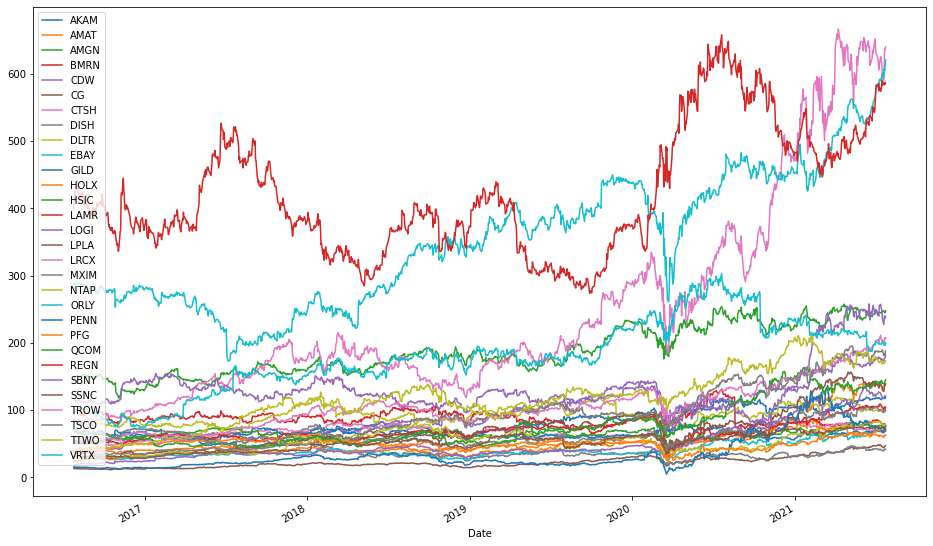

In [13]:
### Let's visualize our adjusted close prices in a graphic.
closes.plot(figsize=[16,10]);

In [10]:
### Let´s calculate the returns.
ret = closes.pct_change().dropna()
ret.head()

,AKAM,AMAT,AMGN,BMRN,CDW,CG,CTSH,DISH,DLTR,EBAY,...,PENN,PFG,QCOM,REGN,SBNY,SSNC,TROW,TSCO,TTWO,VRTX
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-27,-0.130487,0.003357,0.017952,0.065964,-0.001172,-0.022596,-0.006312,-0.003065,-0.009622,-0.002866,...,-0.006949,-0.004014,0.018908,0.042233,-0.009549,-0.014465,0.001843,-0.005859,0.006720,0.010844
2016-07-28,0.003564,-0.010409,0.003516,0.001121,0.001878,0.005335,-0.006180,0.027479,0.004179,-0.004471,...,0.054584,0.001120,-0.001280,-0.009757,-0.004697,0.046267,-0.003396,0.016011,-0.003214,0.002083
2016-07-29,-0.003156,-0.012397,0.004379,0.012424,0.005622,0.018868,-0.006910,-0.000935,0.001769,-0.000321,...,-0.003318,0.042943,0.002403,0.034255,-0.004471,-0.017383,0.003549,0.002955,-0.003472,0.008211
2016-08-01,0.001385,-0.000761,0.012382,0.008348,0.002097,-0.012153,0.016699,0.001123,0.008412,0.002888,...,-0.005326,-0.008578,-0.011665,0.020888,-0.005406,-0.030416,-0.012024,-0.004910,0.002738,0.012371
2016-08-02,-0.012648,-0.011420,-0.000057,-0.011771,-0.009066,-0.015231,-0.010265,-0.080217,-0.008960,-0.014720,...,-0.015395,-0.020549,-0.020210,0.002074,-0.013463,-0.006082,-0.012027,-0.009869,-0.002978,0.009572


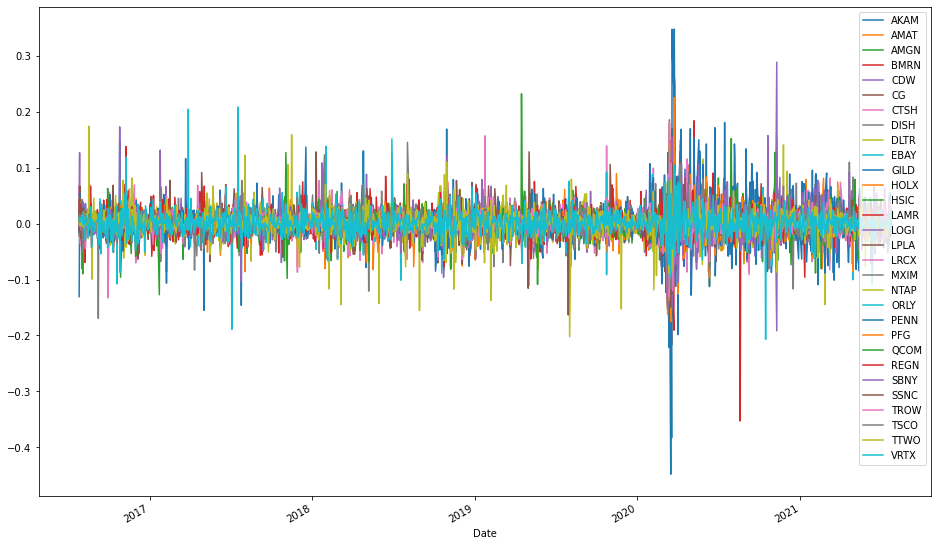

In [14]:
# Let's visualize our returns in a graphic
ret.plot(figsize=[16,10]);

## Minimal Variance Portfolio

In [17]:
### Correlation matrix.
corr = ret.corr()
corr

,AKAM,AMAT,AMGN,BMRN,CDW,CG,CTSH,DISH,DLTR,EBAY,...,PENN,PFG,QCOM,REGN,SBNY,SSNC,TROW,TSCO,TTWO,VRTX
AKAM,1.000000,0.331425,0.364270,0.224928,0.363893,0.230660,0.258499,0.235196,0.157219,0.310408,...,0.088732,0.244333,0.281298,0.277553,0.123545,0.285526,0.398074,0.292072,0.334852,0.311499
AMAT,0.331425,1.000000,0.406725,0.361375,0.561221,0.473652,0.494594,0.418069,0.310220,0.397713,...,0.391946,0.483800,0.600176,0.316226,0.360682,0.505761,0.549708,0.302729,0.415487,0.365116
AMGN,0.364270,0.406725,1.000000,0.452588,0.418929,0.293396,0.406868,0.334788,0.258664,0.325005,...,0.186054,0.372097,0.360360,0.499020,0.271690,0.333812,0.506506,0.310712,0.282423,0.502366
BMRN,0.224928,0.361375,0.452588,1.000000,0.331660,0.349848,0.346234,0.278775,0.184171,0.269576,...,0.263589,0.315882,0.277014,0.416327,0.252123,0.348226,0.378852,0.232096,0.299428,0.475009
CDW,0.363893,0.561221,0.418929,0.331660,1.000000,0.508997,0.500573,0.459468,0.308712,0.362903,...,0.381414,0.581780,0.445132,0.307006,0.474494,0.553382,0.575077,0.338718,0.314978,0.333656
CG,0.230660,0.473652,0.293396,0.349848,0.508997,1.000000,0.420110,0.480120,0.271063,0.314771,...,0.452392,0.581916,0.395937,0.190574,0.458310,0.530113,0.541257,0.270531,0.233054,0.279771
CTSH,0.258499,0.494594,0.406868,0.346234,0.500573,0.420110,1.000000,0.454776,0.289975,0.322455,...,0.368712,0.520739,0.416994,0.232239,0.401198,0.512734,0.544888,0.343979,0.298604,0.315715
DISH,0.235196,0.418069,0.334788,0.278775,0.459468,0.480120,0.454776,1.000000,0.312919,0.265632,...,0.367397,0.532573,0.384189,0.222442,0.477427,0.495544,0.485309,0.285319,0.206683,0.251671
DLTR,0.157219,0.310220,0.258664,0.184171,0.308712,0.271063,0.289975,0.312919,1.000000,0.206940,...,0.275854,0.289339,0.278576,0.149589,0.257255,0.273603,0.311158,0.314599,0.169544,0.168560
EBAY,0.310408,0.397713,0.325005,0.269576,0.362903,0.314771,0.322455,0.265632,0.206940,1.000000,...,0.211267,0.300172,0.305631,0.272369,0.196002,0.333236,0.363413,0.256052,0.322945,0.296171


In [18]:
### Let's calculate our anual returns and our anual std. deviation for every asset.
annual = pd.DataFrame({'Mean':ret.mean()*252, 'Std':ret.std()*np.sqrt(252)})
annual = annual.T
annual

,AKAM,AMAT,AMGN,BMRN,CDW,CG,CTSH,DISH,DLTR,EBAY,...,PENN,PFG,QCOM,REGN,SBNY,SSNC,TROW,TSCO,TTWO,VRTX
Mean,0.195749,0.430470,0.139145,0.037240,0.349007,0.32163,0.088134,0.041129,0.062980,0.219952,...,0.557674,0.169980,0.273393,0.132666,0.223895,0.231082,0.290297,0.206095,0.356661,0.214938
Std,0.318439,0.417396,0.255945,0.371385,0.308479,0.34810,0.297765,0.414507,0.331093,0.289999,...,0.681194,0.362869,0.370720,0.333164,0.399744,0.313515,0.294470,0.299933,0.355853,0.362548


## Risk free rate (annual)

>One year rate (we use it for the day 07/23/21)

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [19]:
### Risk free rate.
rf = 0.07/100

In [22]:
### From the mean variance dataframe calle annual. 
# We create a matrix which the main diagonal is going to be the std. deviation of the assets.
# This will help us to calculate the std. deviation of our portfolio.
S = np.diag(annual.loc['Std'])

In [23]:
### Building the parameters.
# 1. Variance-Covariance matrix Sigma its equal to:
# Sigma = S.dot(corr).dot(S)
Sigma = S.dot(corr).dot(S)

# 3. Eind: expected returns of individual assets
Eind = annual.loc['Mean']

In [24]:
### Building the minimun variance frontier.
# Objective function.
def var(w,Sigma):
    
    ''' Sigma is the variance-covariance matrix'''
    ''' w is a vector that contains the weights of each asset in the portfolio'''
    
    return w.T.dot(Sigma).dot(w)

In [25]:
### Initial values.
w0 = np.ones(len(Eind))/len(Eind)

### Variables limits. 
bnd = ((0,None),)*len(Eind)

### Restrictions.
cons = ({'type':'eq','fun': lambda w: np.sum(w)-1},)

In [26]:
### Optimization.
# Minimal Variance Portfolio.
minvar = minimize(fun=var,x0=w0,args=(Sigma,),bounds=bnd,constraints=cons)
minvar

     fun: 0.030708938122262157
     jac: array([0.06161468, 0.09001735, 0.06162763, 0.06695224, 0.06647203,
       0.06297574, 0.06121846, 0.07526228, 0.06135087, 0.06173729,
       0.06127405, 0.06138153, 0.06149783, 0.06812433, 0.06145195,
       0.069871  , 0.09068051, 0.06981383, 0.06955826, 0.06107868,
       0.08784715, 0.06989663, 0.06786789, 0.06137332, 0.06095415,
       0.06256842, 0.06971627, 0.06135662, 0.06152049, 0.0683751 ])
 message: 'Optimization terminated successfully'
    nfev: 342
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([6.28071084e-02, 1.86211723e-17, 7.69723612e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.06825503e-02, 1.09368894e-17,
       9.13888905e-02, 1.09404236e-01, 1.80877969e-01, 4.44915318e-02,
       1.10568112e-01, 1.36880524e-18, 5.11702475e-02, 0.00000000e+00,
       0.00000000e+00, 4.60785923e-18, 3.93023288e-18, 7.64028764e-02,
       2.11419424e-18, 0.00000000e+00, 7.08797170e-18, 2.66842243e-02,
    

In [82]:
### Weights.
w_minvar = minvar.x

### Porfolio risk.
s_minvar = (var(w_minvar,Sigma))**(0.5)

### Expected return.
E_minvar = Eind.dot(w_minvar)

### Sharpe ratio.
RS_minvar=(E_minvar-rf)/s_minvar

minvar_data = pd.DataFrame({'$\sigma$':s_minvar, '$E[r]$':E_minvar,'Sharpe ratio':RS_minvar},
                            index=['Minimal Variance Portfolio'])
minvar_data.T

,Minimal Variance Portfolio
$\sigma$,0.175240
$E[r]$,0.158231
Sharpe ratio,0.898945


## Efficient Mean Variance Portfolio

In [29]:
### Objective function.
# Now the optimization is respect to the sharpe ratio.
def menos_RS(w,Eind,Sigma,rf):
    
    ''' w is a vector that contain the weights of each asset in the portfolio '''
    ''' Eind expected returns of individual assets '''
    ''' Sigma: Variace-Covariance Matrix '''
    ''' rf: risk free rate '''
    
    return -((Eind.T.dot(w))-rf)/((w.T.dot(Sigma).dot(w))**(0.5))

In [30]:
# Portfolio EMV.
EMV = minimize(fun=menos_RS,x0=w0,args=(Eind,Sigma,rf,),bounds=bnd,constraints=cons)
EMV

     fun: -1.6766697919143887
     jac: array([ 0.11094727,  0.21871392,  0.2026525 ,  0.8970616 , -0.00286873,
        0.07998   ,  0.68983397,  1.19443916,  0.50505553,  0.01229519,
        0.40004849,  0.29059158,  0.48081577,  0.50172715, -0.00288898,
       -0.00262551, -0.00275004,  0.35250524,  0.04890738, -0.00237787,
       -0.00299349,  0.59127432,  0.27633992,  0.24336001,  0.13010967,
        0.37689248,  0.04316013,  0.00123465, -0.00235194,  0.16698948])
 message: 'Optimization terminated successfully'
    nfev: 283
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([2.67249751e-16, 3.94576762e-17, 0.00000000e+00, 1.70691316e-16,
       1.28226007e-01, 4.11944507e-16, 3.31213234e-16, 8.30627557e-16,
       5.70137668e-17, 1.05700503e-16, 0.00000000e+00, 3.12297073e-16,
       1.86886225e-17, 2.56850888e-17, 3.94380105e-01, 2.10195923e-01,
       8.16373106e-02, 1.42119951e-17, 1.31763902e-16, 2.57233096e-16,
       1.08854576e-02, 7.09606903e-17, 4.3908503

In [33]:
### Weights.
W_EMV = EMV.x

### Portfolio Expected return.
E_EMV = Eind.T.dot(W_EMV)

### Portfolio risk.
S_EMV = var(W_EMV,Sigma)**0.5

### Sharpe ratio.
RS_EMV = (E_EMV-rf)/S_EMV

P_EMV = pd.DataFrame({'E[r]':E_EMV, 'std':S_EMV,'Sharpe ratio':RS_EMV},index=['EMV Portfolio'])
P_EMV.T

,EMV Portfolio
E[r],0.431092
std,0.256695
Sharpe ratio,1.676670


## Building the frontier.

In [38]:
### Covariance between the portfolios.
cov_EMV_minvar = W_EMV.dot(Sigma).dot(w_minvar)
print(f'The covariance between portfolios: {cov_EMV_minvar*100}%')

The covariance between portfolios: 3.332708734176716%


In [39]:
### Correlation between portfolios.
corr_EMV_minvar = cov_EMV_minvar/(S_EMV*s_minvar)
print(f'The correlation between portfolios: {corr_EMV_minvar*100}%')

The correlation between portfolios: 74.08802950070903%


In [66]:
### Portfolios dataframe: 
# 1. Index: i
# 2. Columns 1-2: w, 1-w
# 3. Columns 3-4: E[r], sigma
# 4. Columms 5: Sharpe ratio

### Vector of weights.
wp = np.linspace(0,1,1000)

fron_min_var = pd.DataFrame({'w':wp,'w(minvar)':1-wp,'Media':E_EMV*wp+(1-wp)*E_minvar,
                             'vol':(((wp*S_EMV)**2+(1-wp)**2*s_minvar**2+2*wp*(1-wp)*cov_EMV_minvar)**0.5),
                             'RS':((E_EMV*wp+(1-wp)*E_minvar)-rf)/((((wp*S_EMV)**2+(1-wp)**2*s_minvar**2+2*wp*(1-wp)*cov_EMV_minvar)**0.5))})
fron_min_var

,w,w(minvar),Media,vol,RS
0,0.000000,1.000000,0.158231,0.175240,0.898945
1,0.001001,0.998999,0.158504,0.175255,0.900427
2,0.002002,0.997998,0.158777,0.175270,0.901907
3,0.003003,0.996997,0.159050,0.175285,0.903386
4,0.004004,0.995996,0.159323,0.175301,0.904864
...,...,...,...,...,...
995,0.995996,0.004004,0.430000,0.256187,1.675727
996,0.996997,0.003003,0.430273,0.256314,1.675963
997,0.997998,0.002002,0.430546,0.256441,1.676199
998,0.998999,0.001001,0.430819,0.256568,1.676435


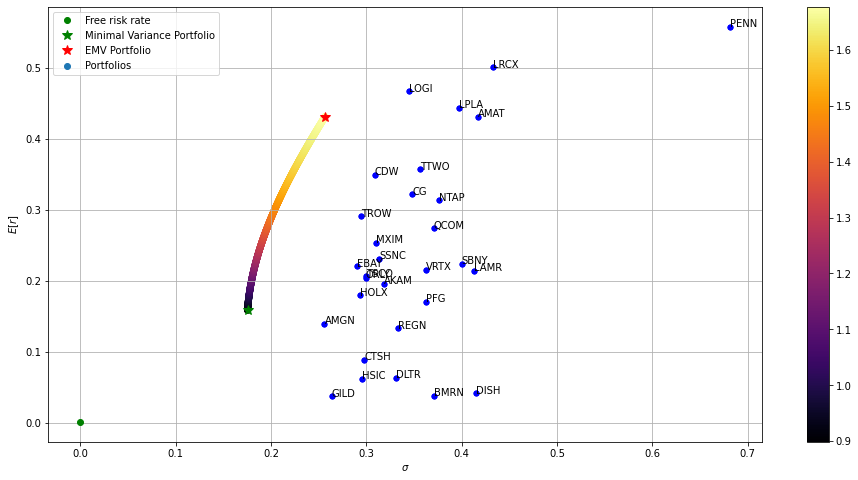

In [71]:
### Plotting the portfolios.
plt.figure(figsize=(16,8))
plt.xlabel('$\sigma$')
plt.ylabel('$E[r]$')

# Free risk rate.
plt.plot(0,rf,'og',label='Free risk rate')

# Minvar portfolio.
plt.plot(s_minvar,E_minvar,'*g',ms=10, label='Minimal Variance Portfolio')

# EMV portfolio.
plt.plot(S_EMV,E_EMV,'*r',ms=10, label='EMV Portfolio')

# Assets.
for i in range(len(annual)):
    plt.plot(annual.loc['Std'],annual.loc['Mean'],'ob',ms=5)
for i in range(0,len(Eind)):
    plt.text(annual.iloc[1,i],annual.iloc[0,i],annual.columns[i])
    
plt.scatter(fron_min_var['vol'],fron_min_var['Media'],c=fron_min_var['RS'],cmap='inferno',label='Portfolios')
plt.colorbar()
plt.grid()
plt.legend(loc='best');

## Capital Asignation Line.

Let's assume we have a total budget for invest of $\$100,000$. With the analysis that we previously developed the captial asignation line will give us the optimal portfolio depending on our risk aversion coefficient, the weightins that this process returns includes the risk free rate as a possible investment. For the purpose of this tutorial we´re interested in the assets that aren´t risk free, that´s why the final output of this document will be a dataframe with the name of the assets and their weights on the particular portfolio.

In order to get the optimal asignation of capital, we need to know our risk aversion coefficent. [You can check here](https://www.wsj.com/articles/check-your-tolerance-for-investment-risk-now-before-markets-sag-1405619939)

For practical reasons, let's assume we have risk aversion coefficient of $8$.

In [72]:
### Let's build our CAL.
LAC = pd.DataFrame({'w(EMV)': wp,
                    'w(rf)': 1 - wp,
                    '$E[r]$': wp * E_EMV + (1 - wp) * rf,
                    '$\sigma$': wp * S_EMV
                   })

LAC['RS'] = (LAC['$E[r]$'] - rf) / LAC['$\sigma$']
LAC.head()

,w(EMV),w(rf),$E[r]$,$\sigma$,RS
0,0.000000,1.000000,0.000700,0.000000,NaN
1,0.001001,0.998999,0.001131,0.000257,1.67667
2,0.002002,0.997998,0.001562,0.000514,1.67667
3,0.003003,0.996997,0.001992,0.000771,1.67667
4,0.004004,0.995996,0.002423,0.001028,1.67667


In [77]:
### Now let´s see how much invest in our assets portfolio and how much for the risk free rate.
gamma = 8
w_client = (E_EMV - rf) / (gamma * S_EMV**2)

# Dataframe
asignation_C = pd.DataFrame({'w(EMV)': w_client*100,
                             'w(rf)': (1 - w_client)*100,
                             'Gamma': gamma},
                             index = ['Capital Asignation in %'])
asignation_C

,w(EMV),w(rf),Gamma
Capital Asignation in %,81.647076,18.352924,8


In [78]:
### Results.
print(f'The optimal investment in our EMV portfolio is: {w_client*100}%')
print(f'The optimal investment in our risk free rate is: {(1-w_client)*100}%')

The optimal investment in our EMV portfolio is: 81.64707616357153%
The optimal investment in our risk free rate is: 18.35292383642847%


Now let´s see the particular weights in our EMV portfolio.

In [91]:
### Let's get the weigths and their respective asset.
EMV_port = {i: EMV.x[j]*100 for i,j in zip(tickers, range(len(tickers)))}
EMV_df_final = pd.DataFrame.from_dict(EMV_port, orient='index', columns=['Weights in %'])
EMV_df_final.index.name = 'Stocks'

EMV_df_final

,Weights in %
Stocks,
CG,2.672498e-14
HOLX,3.945768e-15
DISH,0.000000e+00
PFG,1.706913e-14
DLTR,1.282260e+01
EBAY,4.119445e-14
GILD,3.312132e-14
TROW,8.306276e-14
REGN,5.701377e-15


In [98]:
### Final product of the document. This command will export a csv file on your repository carpet.
EMV_df_final.to_csv('Portfolio_weights.csv')

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Sociedad de Alumnos de Ingeniería Financiera.
</footer>